# IMPORT LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EXPLORATORY DATA ANALYSIS

In [2]:
car_purchasing = pd.read_csv("car_purchasing.csv", encoding= "latin-1")

In [3]:
car_purchasing.shape

(500, 9)

In [4]:
car_purchasing.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
car_purchasing.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [6]:
car_purchasing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
car_purchasing.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [8]:
# correlation between the target value, car purchase amount, and other numerical columns higher to lower
car_purchasing[['age','annual Salary', 'credit card debt', 'net worth','car purchase amount']].corr()["car purchase amount"].sort_values(ascending=False)

car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
Name: car purchase amount, dtype: float64

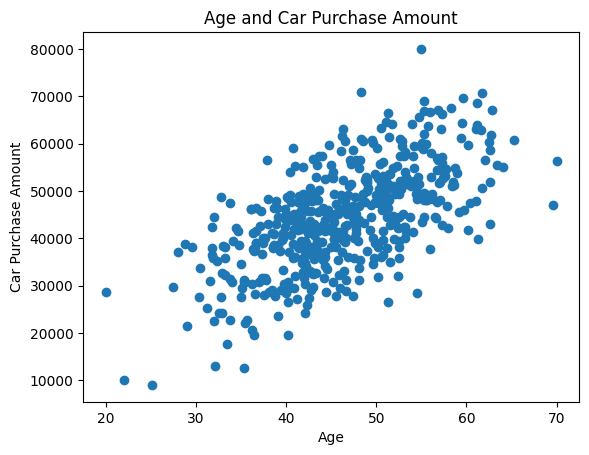

In [9]:
plt.scatter(car_purchasing["age"], car_purchasing["car purchase amount"])
plt.title("Age and Car Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Car Purchase Amount")
plt.show()

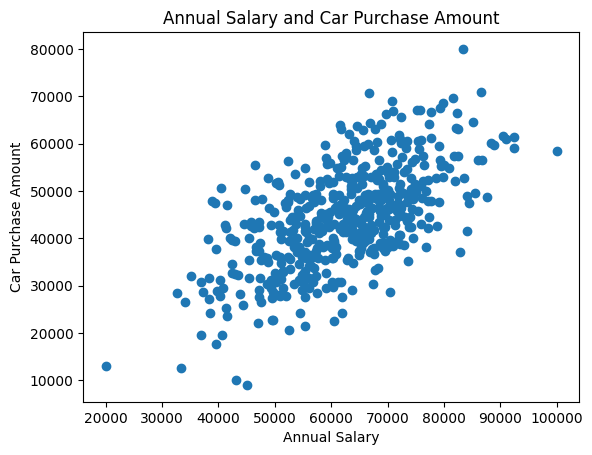

In [10]:
plt.scatter(car_purchasing["annual Salary"], car_purchasing["car purchase amount"])
plt.title("Annual Salary and Car Purchase Amount")
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.show()

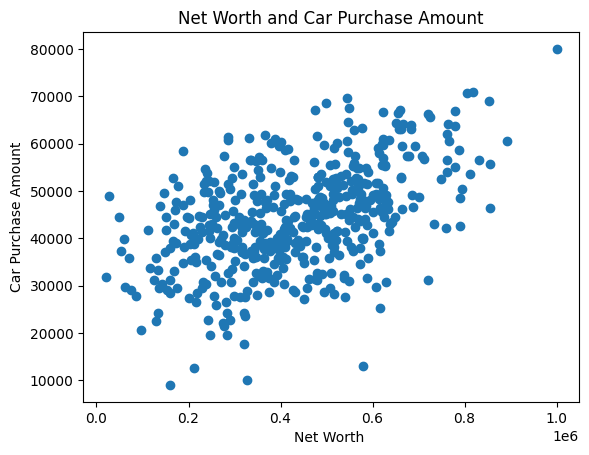

In [11]:
plt.scatter(car_purchasing["net worth"], car_purchasing["car purchase amount"])
plt.title("Net Worth and Car Purchase Amount")
plt.xlabel("Net Worth ")
plt.ylabel("Car Purchase Amount")
plt.show()

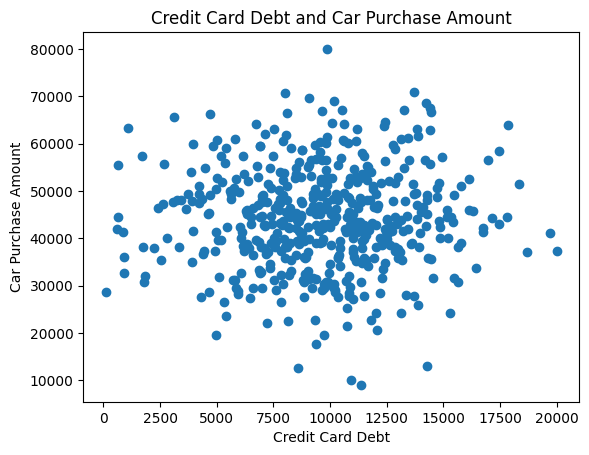

In [12]:
plt.scatter(car_purchasing["credit card debt"], car_purchasing["car purchase amount"])
plt.title("Credit Card Debt and Car Purchase Amount")
plt.xlabel("Credit Card Debt")
plt.ylabel("Car Purchase Amount")
plt.show()

In [13]:
# Isabella might be a female name in DataFrame, so 1 --> Female and 0 --> Male
car_purchasing["gender label"] = car_purchasing["gender"].apply(lambda x: "Female" if x == 1 else "Male")
car_purchasing.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,gender label
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Male
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,Male
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Female
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Female
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,Female


In [14]:
car_purchasing["gender label"].value_counts()

gender label
Female    253
Male      247
Name: count, dtype: int64

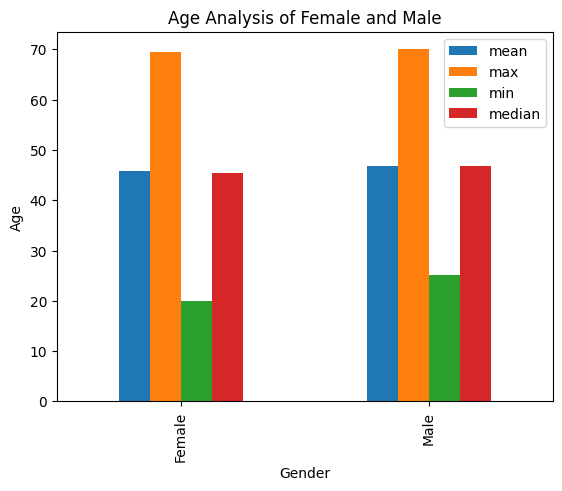

In [15]:
car_purchasing.groupby("gender label")["age"].agg(["mean", "max", "min", "median"]).plot(kind= "bar", title= "Age Analysis of Female and Male", xlabel= "Gender", ylabel="Age")
plt.show()


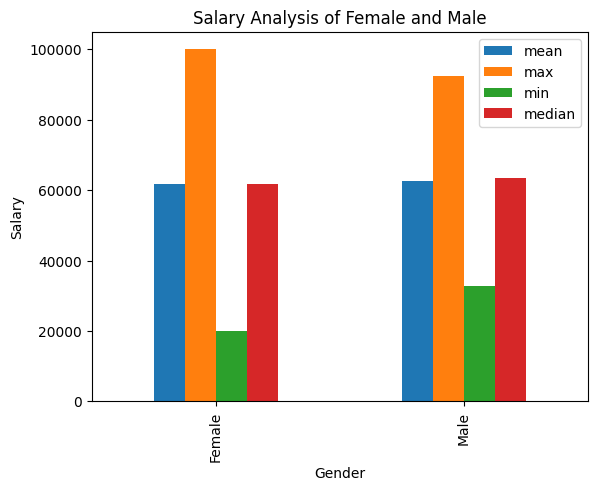

In [16]:
car_purchasing.groupby("gender label")["annual Salary"].agg(["mean", "max", "min", "median"]).plot(kind= "bar", title= "Salary Analysis of Female and Male", xlabel= "Gender", ylabel= "Salary")
plt.show()

In [17]:
def age_ranges(row):
    if row["age"] < 30:
        return "20 - 30"
    elif row["age"] < 40:
        return "30 - 40"
    elif row["age"] < 50:
        return "40 - 50"
    elif row["age"] < 60:
        return "50 - 60"
    else:
        return "60-70"
   
    

In [18]:
car_purchasing["age ranges"] = car_purchasing.apply(age_ranges, axis= 1)
car_purchasing.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,gender label,age ranges
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Male,40 - 50
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,Male,40 - 50
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Female,40 - 50
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Female,50 - 60
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,Female,50 - 60


In [19]:
car_purchasing["age ranges"].value_counts()

age ranges
40 - 50    231
50 - 60    142
30 - 40     96
60-70       23
20 - 30      8
Name: count, dtype: int64

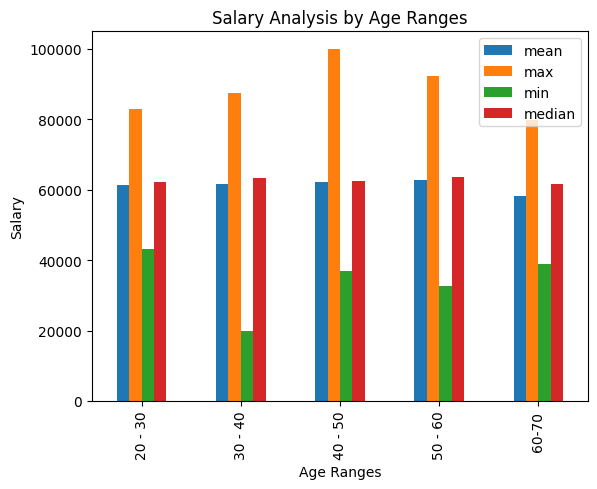

In [20]:
car_purchasing.groupby("age ranges")["annual Salary"].agg(["mean", "max", "min", "median"]).plot(kind= "bar", title= "Salary Analysis by Age Ranges", xlabel= "Age Ranges", ylabel= "Salary")
plt.show()

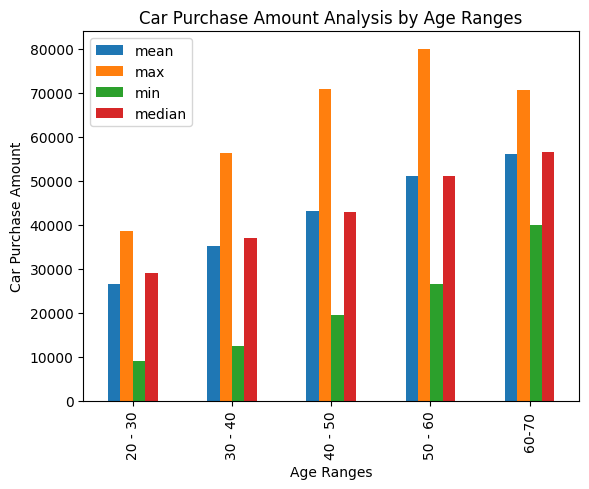

In [21]:
car_purchasing.groupby("age ranges")["car purchase amount"].agg(["mean", "max", "min", "median"]).plot(kind= "bar", title= "Car Purchase Amount Analysis by Age Ranges", xlabel= "Age Ranges", ylabel= "Car Purchase Amount")
plt.show()

In [22]:
car_purchasing.groupby(["age ranges", "gender label"])["annual Salary"].mean()


age ranges  gender label
20 - 30     Female          61656.174270
            Male            61101.667473
30 - 40     Female          60474.781313
            Male            63300.221926
40 - 50     Female          61293.340418
            Male            63347.080071
50 - 60     Female          63165.221037
            Male            62529.281355
60-70       Female          63876.773028
            Male            53885.836882
Name: annual Salary, dtype: float64

In [23]:
car_purchasing.groupby(["age ranges", "gender label"])["car purchase amount"].mean()

age ranges  gender label
20 - 30     Female          27417.853146
            Male            25277.462433
30 - 40     Female          34698.012126
            Male            36033.521977
40 - 50     Female          42136.093969
            Male            44183.213731
50 - 60     Female          52224.305711
            Male            50086.066111
60-70       Female          59429.713077
            Male            53534.350440
Name: car purchase amount, dtype: float64

# MODEL 

In [24]:
X = car_purchasing[["age", "annual Salary", "net worth" ]]
y = car_purchasing[["car purchase amount"]]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [27]:
#import joblib
#joblib.dump(scaler, "scaler.pkl")

In [28]:
X_test = scaler.fit_transform(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def model_results(prediction):
    print("Mean absolute error on model is {}". format(mean_absolute_error(y_test, prediction)))
    print("Root mean squared error on model is {}". format(np.sqrt(mean_squared_error(y_test, prediction))))

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
e_net = ElasticNet()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

models = [lr, ridge, lasso, e_net, dtr, rfr, gbr, svr]

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def training(model):
    # Print model information
    print("Evaluating Model Name :", model)

    # Train the model on the training data
    model.fit(X_train, y_train.values.ravel())

    # Make predictions on the testing data
    prediction = model.predict(X_test)

    # Evaluate model performance using various metrics

    # Accuracy: Proportion of correct predictions
    mse = mean_squared_error(prediction, y_test)
    print("Mean Squared Error:", mse)

    rmse = np.sqrt(mse)
    print( "Root Mean Squared Error: ", rmse )

    # Recall: Proportion of true positives correctly identified
    r2 = r2_score(prediction, y_test)
    print("R-Squared: ", r2)


In [32]:
for model in models:
    training(model)
    print()

Evaluating Model Name : LinearRegression()
Mean Squared Error: 2322809.8713570293
Root Mean Squared Error:  1524.076727516377
R-Squared:  0.9812613028609416

Evaluating Model Name : Ridge()
Mean Squared Error: 2282589.643244465
Root Mean Squared Error:  1510.8241602663313
R-Squared:  0.9814944969477434

Evaluating Model Name : Lasso()
Mean Squared Error: 2320211.7150659123
Root Mean Squared Error:  1523.224118462517
R-Squared:  0.9812763555035513

Evaluating Model Name : ElasticNet()
Mean Squared Error: 10425570.777669284
Root Mean Squared Error:  3228.865246130486
R-Squared:  0.8119925679627564

Evaluating Model Name : DecisionTreeRegressor()
Mean Squared Error: 14500641.78444245
Root Mean Squared Error:  3807.9708224253045
R-Squared:  0.8665976295663496

Evaluating Model Name : RandomForestRegressor()
Mean Squared Error: 6086605.56676545
Root Mean Squared Error:  2467.1046931100127
R-Squared:  0.9383981849585648

Evaluating Model Name : GradientBoostingRegressor()
Mean Squared Error:

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)
model_results(lr_prediction)

Mean absolute error on model is 1328.495372189022
Root mean squared error on model is 1524.076727516377


In [34]:
car_purchasing["car purchase amount"].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64

# SVR

In [35]:
from sklearn.svm import SVR
svr = SVR()

svr_param_grid = {"C": [1000],
                  "kernel": ["linear", "rbf", "poly"] ,
                  "degree": [0,1,2]}

In [36]:
from sklearn.model_selection import GridSearchCV
gridsvr = GridSearchCV(svr, svr_param_grid)

In [37]:
gridsvr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000], 'degree': [0, 1, 2],
                         'kernel': ['linear', 'rbf', 'poly']})

In [38]:
gridsvr_prediction = gridsvr.predict(X_test)
model_results(gridsvr_prediction)

Mean absolute error on model is 1328.526385641792
Root mean squared error on model is 1524.0600676623856


In [39]:
gridsvr.best_params_

{'C': 1000, 'degree': 0, 'kernel': 'linear'}

# Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr_param_grid = {"max_depth": [9,10,11,12,13,14], 
                  "n_estimators": [110,111,112,113,114,115,120,]}

In [41]:
gridrfr = GridSearchCV(rfr, rfr_param_grid)
gridrfr.fit(X_train, y_train.values.ravel())
gridrfr_prediction = gridrfr.predict(X_test)
model_results(gridrfr_prediction)

Mean absolute error on model is 1799.672583206029
Root mean squared error on model is 2336.122678488632


In [42]:
gridrfr.best_params_

{'max_depth': 10, 'n_estimators': 110}

In [43]:
import pickle
pickle.dump(lr, open("car_purchasing.sav", "wb"))